In [31]:
# Weather for Salt Lake
import matplotlib.pyplot as plt
import requests 
from scipy import stats
import pandas as pd
from config import APIKEY
from datetime import datetime
from meteostat import Point, Daily


In [19]:
#using the weather map for data

url= "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

query_url = f"{url}appid={APIKEY}&units={units}&q="

In [38]:
#Selected City: Salt Lake City UT. 

cities = ["Salt Lake City"]

lat = []
temp = []
for city in cities:
    response = requests.get(query_url + city).json()
    lat.append(response['coord']['lat'])
    temp.append(response['main']['temp'])

    
print(f"The latitude information received is: {lat}")
print(f"The temperature information received is: {temp}")

weather_dict = {
    "city": cities,
    "lat": lat,
    "temp": temp
}
weather_data = pd.DataFrame(weather_dict)
weather_data


The latitude information received is: [40.7608]
The temperature information received is: [2.64]


,city,lat,temp
0,Salt Lake City,40.7608,2.64


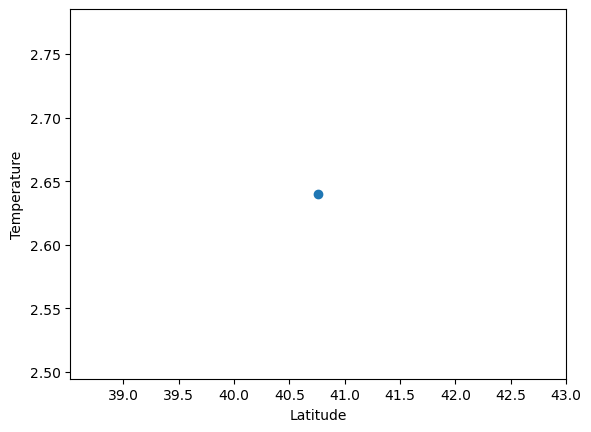

In [39]:
#Salt Lake comparison of Temperature based on latitude
x_values = weather_data['lat']
y_values = weather_data['temp']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.show()

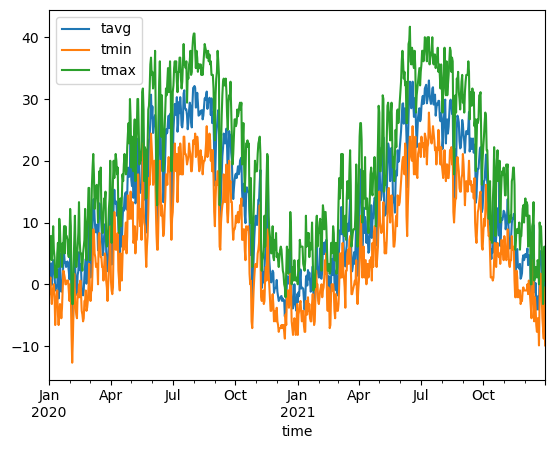

In [33]:
start = datetime(2020,1,1)
end = datetime(2021,12,31)
#Salt Lake City temperature average in min,avg and max
location = Point(40.759926, -111.884888)
data = Daily(location,start,end)
data = data.fetch()

data.plot(y=['tavg','tmin','tmax'])
plt.show()


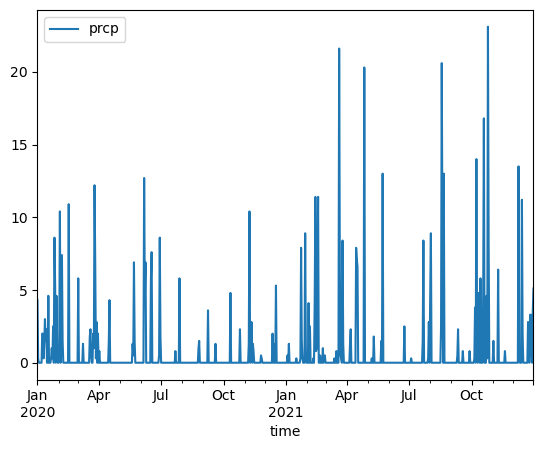

In [49]:
#Precipitaion example measured in mm. Highest measurements of precipitation were nearly double the next year.

start = datetime(2020,1,1)
end = datetime(2021,12,31)
location = Point(40.759926, -111.884888)
data = Daily(location,start,end)
data = data.fetch()

data.plot(y=['prcp'])
plt.show()

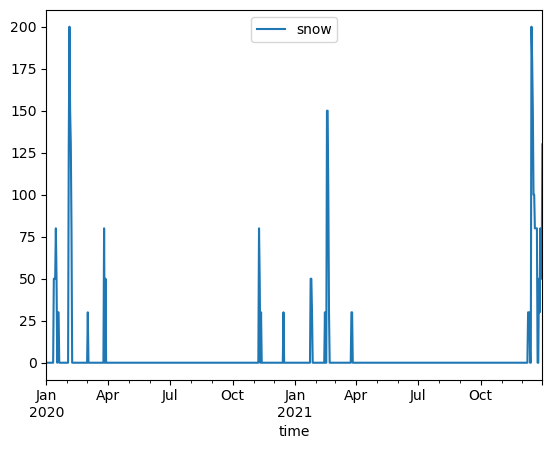

In [52]:
#snow example snow depth measured in mm. Difference between year one and two

start = datetime(2020,1,1)
end = datetime(2021,12,31)
location = Point(40.759926, -111.884888)
data = Daily(location,start,end)
data = data.fetch()

data.plot(y=['snow'])
plt.show()